In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
!pip install statsmodels
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest
sns.set(style="ticks")
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

### Business Problem and Dataset

* This case and dataset is taken from the measurement problems course on www.miuul.com.

* Facebook recently introduced a new bidding type, 'average bidding', as an alternative to the existing bidding type called 'maximumbidding'. One of our clients, xyz.com, decided to test this new feature and would like to run an A/B test to see if average bidding converts more than maximumbidding. 

* The A/B test has been going on for 1 month and xyz.com is now waiting for you to analyze the results of this A/B test. The ultimate success criterion for Bombabomba.com is Purchase. Therefore, the Purchase metric should be focused on for statistical tests.


In [2]:
!pip install openpyxl
df_control=pd.read_excel("../input/ab-test/ab_testing.xlsx",sheet_name="Control Group",engine="openpyxl")
df_test=pd.read_excel("../input/ab-test/ab_testing.xlsx",sheet_name="Test Group",engine="openpyxl")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 4.7 MB/s eta 0:00:00


In [3]:
df_control.head()

,Impression,Click,Purchase,Earning
0,82529.459271,6090.077317,665.211255,2311.277143
1,98050.451926,3382.861786,315.084895,1742.806855
2,82696.023549,4167.965750,458.083738,1797.827447
3,109914.400398,4910.882240,487.090773,1696.229178
4,108457.762630,5987.655811,441.034050,1543.720179


In [4]:
round( df_control.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Impression,40.0,101711.45,20302.16,45475.94,85726.69,99790.70,115212.82,147539.34
Click,40.0,5100.66,1329.99,2189.75,4124.30,5001.22,5923.80,7959.13
Purchase,40.0,550.89,134.11,267.03,470.10,531.21,637.96,801.80
Earning,40.0,1908.57,302.92,1253.99,1685.85,1975.16,2119.80,2497.30


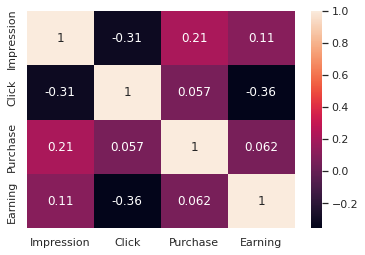

In [5]:
sns.heatmap(df_control.corr(), annot=True);

In [6]:
df_test.head()

,Impression,Click,Purchase,Earning
0,120103.503796,3216.547958,702.160346,1939.611243
1,134775.943363,3635.082422,834.054286,2929.405820
2,107806.620788,3057.143560,422.934258,2526.244877
3,116445.275526,4650.473911,429.033535,2281.428574
4,145082.516838,5201.387724,749.860442,2781.697521


In [7]:
round( df_control.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Impression,40.0,101711.45,20302.16,45475.94,85726.69,99790.70,115212.82,147539.34
Click,40.0,5100.66,1329.99,2189.75,4124.30,5001.22,5923.80,7959.13
Purchase,40.0,550.89,134.11,267.03,470.10,531.21,637.96,801.80
Earning,40.0,1908.57,302.92,1253.99,1685.85,1975.16,2119.80,2497.30


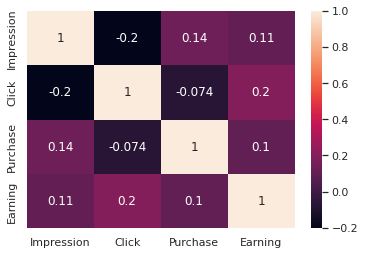

In [8]:
sns.heatmap(df_test.corr(), annot=True);

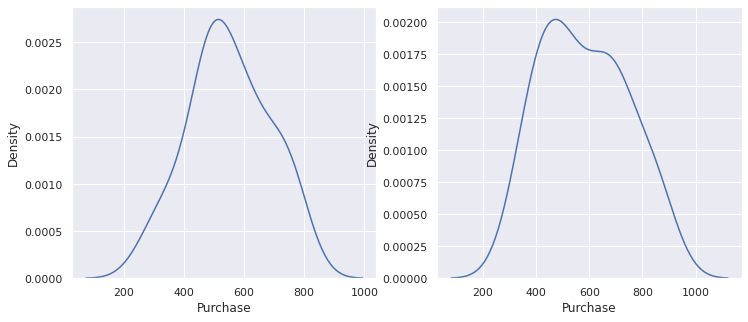

In [9]:
# density plot
fig,axes =plt.subplots(1,2,figsize=(12,5))
sns.kdeplot(df_control["Purchase"],ax=axes[0]);
sns.kdeplot(df_test["Purchase"],ax=axes[1]);
plt.show()

In [10]:
print("Purchase mean of control group :",df_control["Purchase"].mean())
print("Purchase mean of test group :",df_test["Purchase"].mean())

Purchase mean of control group : 550.8940587702316
Purchase mean of test group : 582.1060966484677


* When we look at the correlation matrix, we can see that the correlation between the variables is very low. 

* When we examine both the explanatory statistics and density plots of the purchase variable of the control group and test group, we can see that they are close to the normal distribution. But to be sure, it is necessary to check the normality assumption with the shapiro test.

* When we examine the averages of the purchase variable of the control group and test group, there is a difference of about 32 units. We should use the indepentdent t-test to test whether this difference is statistically significant.

### A/B Test - Independent t-test

*  **A/B Test - Independent t-test Roadmap**
    1. Establish Hypotheses
    2. Assumption Check
         1. Normality Assumption
         2. Variance Homogeneity
    3. Implementation of the Hypothesis
        1. Independent two-sample t-test (parametric test) if assumptions are met
        2. If the assumptions are not provided, the mannwhitneyu test (non-parametric test)
    4. Interpret results based on p-value

#### 1. Establish Hypotheses

* M1 : purchase mean of control group
* M2 : purchase mean of test group

* H0: M1 = M2 (There is not  a statistical difference between purchase means)
* H1: M1 != M2 (There is a statistical difference between purchase means)

* if p-value < 0.05, H0 hypothesis reject

#### 2. Assumption Check

* Before we move on to hypothesis testing, we need to examine the assumptions.The assumptions are :
* Data should be normally distributed and variances should be homogeneous.

* Normality assumptions checking:

* H0 : data is normally distributed
* H1 : data is not normally distributed
* if p-value < 0.05 H0 hypothesis reject. Shapiro test can be used for normality test.

In [11]:
test_stat, pvalue = shapiro(df_control["Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9773, p-value = 0.5891


In [12]:
test_stat, pvalue = shapiro(df_test["Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9589, p-value = 0.1541


* When the shapiro normality test for the control and test groups was examined, the p-values of both groups were greater than 0.05. Therefore, the H0 hypothesis cannot be rejected and it is concluded that both data are "normally distributed".

* Homogeneity assumption checking :

* H0 : variances are homogeneous. variances are homogeneous.
* H1 : variances are not homogeneous.
* if p-value < 0.05 H0 hypothesis reject. Levene test can be used for homogeneity assumption.

In [13]:
test_stat, pvalue = levene(df_control["Purchase"],df_test["Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 2.6393, p-value = 0.1083


* When the homogeneity assumption was examined with the Levene test, it was seen that the p-value was greater than 0.05 and the H0 hypothesis could not be rejected. Thus, it is concluded that the variances are homogeneous.

* Since the assumptions of normality and homogeneity are satisfied, we will perform an independent t-test. We made equal_var=True. So variances are homogeneous. If the assumption of normality is satisfied but homogeneous are not equal then equal_var=False would be.

#### 3. Implementation of the Hypothesis

In [14]:
test_stat, pvalue = ttest_ind(df_control["Purchase"],df_test["Purchase"],
                              equal_var=True)

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = -0.9416, p-value = 0.3493


#### 4. Interpret results based on p-value

* When the independent t-test is performed, it is seen that the p-value is greater than 0.05. Thus, we cannot reject the H0 hypothesis. There is no statistically significant difference between the mean purchases in the test and control groups.